## Price Prediction Indicator
##### Lifee cycle of the project
- Understanding the problem statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1) Problem statement
- This project understands how different variables affect the price oh houses

##### 2.1 Import Data and Required packages
Pandas,Numpy,Seaborn,Matplotlib, and Warnings Library.

In [48]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

##### Import the CSV Data as Pandas DataFrame

In [49]:
df = pd.read_csv("Real_Estate_Sales_2001-2020_GL.csv")

In [50]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [51]:
df.tail(500)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
996713,190046,2019,02/19/2020,Westbrook,67 ORTNER DR,374120.0,444000.0,0.842600,Single Family,Single Family,NaN,COLONIAL,NaN,NaN
996714,1901819,2019,09/24/2020,Stamford,5 TAMAR LANE,681140.0,900000.0,0.756800,Single Family,Single Family,NaN,NaN,NaN,NaN
996715,190292,2019,06/12/2020,Stonington,66 FAIR ACRES CIRCLE,16800.0,8000.0,2.100000,Single Family,Single Family,NaN,NaN,MOBILE HOME,NaN
996716,190080,2019,05/05/2020,Westbrook,376 & 380 HORSE HILL RD,126160.0,49000.0,2.574700,NaN,NaN,25 - Other,"2 VAC 376 - 63,340/ 380 - 62,820, ESMNTS",BELOW MARKET - 12 ACRE LAND SALE,NaN
996717,19033,2019,07/22/2020,Norfolk,105 GREENWOODS ROAD EAST,377220.0,152960.0,2.466100,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN


In [52]:
df.shape

(997213, 14)

##### 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

##### Checking duplicates

In [53]:
df.duplicated().sum()

0

##### Checking Data types

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


##### Checking missing values

In [55]:
df.isna().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64

##### Checking the number of unique Values in each column

In [56]:
df.nunique()

Serial Number        83537
List Year               20
Date Recorded         6387
Town                   170
Address             714371
Assessed Value       91378
Sale Amount          57372
Sales Ratio         547044
Property Type           11
Residential Type         5
Non Use Code           106
Assessor Remarks     66508
OPM remarks           4825
Location            130529
dtype: int64

##### Checking column names 

In [57]:
df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

##### Droping the redundant columns

In [58]:
df.drop(columns=['Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],axis=1, inplace=True)

In [59]:
df

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family


In [60]:
print(df['List Year'].unique())
print(df['Date Recorded'].unique())

[2020 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019]
['09/13/2021' '10/02/2020' '03/09/2021' ... '04/12/2020' '03/21/2020'
 '03/07/2020']


In [61]:
df.drop(columns=['Serial Number'],axis=1, inplace=True)

In [62]:
df

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN
1,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family
2,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo
3,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family
4,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family
...,...,...,...,...,...,...,...,...,...
997208,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family
997209,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family
997210,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family
997211,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family


##### Droping the rows where the sales amount and the assessed value is less than 1

In [63]:
ind=(df['Sale Amount'] < 1.0) & (df['Assessed Value'] < 1.0)
index_of_ind= df[ind].index
df.drop(index_of_ind, inplace=True)

In [64]:
df.isna().sum()

List Year                0
Date Recorded            0
Town                     0
Address                 24
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382159
Residential Type    388022
dtype: int64

##### Droping the row where the address is missing 

In [65]:
uu=(pd.isna(df['Address']))
index_of_uu=df[uu].index
df.drop(index_of_uu,inplace=True)

In [66]:
df.isna().sum()

List Year                0
Date Recorded            0
Town                     0
Address                  0
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382139
Residential Type    388002
dtype: int64

##### Counting the values of property type and residential type to know the most ocurring value 

In [67]:
df['Property Type'].value_counts()

Property Type
Single Family     401610
Condo             105419
Residential        60728
Two Family         26407
Three Family       12586
Vacant Land         3163
Four Family         2150
Commercial          1981
Apartments           486
Industrial           228
Public Utility         5
Name: count, dtype: int64

In [68]:
df['Residential Type'].value_counts()

Residential Type
Single Family    445014
Condo            117779
Two Family        29608
Three Family      14081
Four Family        2418
Name: count, dtype: int64

##### Insight
- Single family and condo are most recurring in both Residential and Property type

In [69]:
df.fillna('Single Family',inplace=True)

In [70]:
df.isna().sum()

List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
dtype: int64

##### Checking the statistics of the data

In [71]:
df.describe()

,List Year,Assessed Value,Sale Amount,Sales Ratio
count,996902.000000,9.969020e+05,9.969020e+05,9.969020e+05
mean,2010.191941,2.792267e+05,3.912594e+05,1.044958e+01
std,6.237601,1.670862e+06,5.348096e+06,1.890487e+03
min,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2004.000000,8.764000e+04,1.400000e+05,4.868313e-01
50%,2010.000000,1.384000e+05,2.250000e+05,6.246875e-01
75%,2016.000000,2.256000e+05,3.650000e+05,7.853773e-01
max,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06


In [72]:
df[df['Sales Ratio']==0]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
75,2001,09/23/2002,Coventry,400 EASTVIEW DR,0.0,325400.0,0.0,Single Family,Single Family
86,2001,01/03/2002,Bethany,9 SIMPSON CT,96590.0,0.0,0.0,Single Family,Single Family
96,2001,08/13/2002,Bolton,45 BEACON CT,0.0,12350.0,0.0,Single Family,Single Family
127,2001,12/04/2001,Stafford,15 JENNIFER LN,0.0,165155.0,0.0,Single Family,Single Family
133,2001,01/15/2002,Stratford,1101 SUCCESS AVE,0.0,50000.0,0.0,Single Family,Single Family
...,...,...,...,...,...,...,...,...,...
992904,2019,11/22/2019,Windham,234 BEAVER HILL RD,0.0,30000.0,0.0,Single Family,Single Family
994922,2019,04/02/2020,Oxford,1029 TURNBERRY CT,0.0,418905.0,0.0,Condo,Condo
996063,2019,06/04/2020,Simsbury,24 HENDRICKS LANE,0.0,230450.0,0.0,Single Family,Single Family
996597,2019,07/01/2020,Oxford,735 CHAMPIONSHIP DR,0.0,482850.0,0.0,Condo,Condo


##### Slicing through the Date Recorded column to get the year

In [73]:
df['Date Recorded']=df['Date Recorded'].str[6:]
df

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020,2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,Single Family
1,2020,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family
2,2020,2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo
3,2020,2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family
4,2020,2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family
...,...,...,...,...,...,...,...,...,...
997208,2019,2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family
997209,2019,2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family
997210,2019,2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family
997211,2019,2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family


##### Printing each categorical column

In [74]:
print("categories in 'List Year' variable: ",end=" ")
print(df['List Year'].unique())

print("Category in 'Date Recorded' variable: ",end=" ")
print(df['Date Recorded'].unique())

print("Category 'Town' variable: ",end=" ")
print(df['Town'].unique())

print("Category 'Address' variable: ",end=" ")
print(df['Address'].unique())

print("Category 'Property Type' variable: ",end=" ")
print(df['Property Type'].unique())

print("Category 'Residential Type' variable: ",end=" ")
print(df['Residential Type'].unique())

categories in 'List Year' variable:  [2020 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019]
Category in 'Date Recorded' variable:  ['2021' '2020' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008'
 '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018'
 '2019' '1999']
Category 'Town' variable:  ['Ansonia' 'Ashford' 'Avon' 'Berlin' 'Bethany' 'Bethel' 'Bethlehem'
 'Bloomfield' 'Branford' 'Bristol' 'Brookfield' 'Canaan' 'Canton'
 'Cheshire' 'Chester' 'Colchester' 'Columbia' 'Cornwall' 'Coventry'
 'Cromwell' 'Danbury' 'Derby' 'Eastford' 'East Haddam' 'East Haven'
 'Farmington' 'Chaplin' 'Clinton' 'East Lyme' 'Easton' 'Enfield' 'Essex'
 'Durham' 'Franklin' 'Glastonbury' 'Hamden' 'Granby' 'Greenwich'
 'Colebrook' 'East Windsor' 'Griswold' 'Bolton' 'Groton' 'Guilford'
 'Hartford' 'Harwinton' 'Milford' 'Killingly' 'Killingworth' 'Lebanon'
 'Lisbon' 'Litchfield' 'Lyme' 'Manchester' 'Putnam' 'Norwalk' 'Stafford'
 'Mansfield' 'Sh

In [75]:
# searching for the uunknow in the town column
df[df['Town'] == '***Unknown***']

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
444657,2007,2007,***Unknown***,18 MATHIEU LANE,66540.0,282450.0,0.235582,Single Family,Single Family


In [76]:
df['Town'].value_counts()

Town
Bridgeport       34185
Stamford         32527
Waterbury        28505
Norwalk          23959
New Haven        21346
                 ...  
Hartland           448
Scotland           430
Canaan             428
Union              261
***Unknown***        1
Name: count, Length: 170, dtype: int64

In [77]:
# we are replacing the unknown with the highest occuring value in the column
df['Town'].replace('***Unknown***', 'Bridgeport',inplace=True)

In [78]:
df['List Year'] = df['List Year'].astype(str)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 996902 entries, 0 to 997212
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   List Year         996902 non-null  object 
 1   Date Recorded     996902 non-null  object 
 2   Town              996902 non-null  object 
 3   Address           996902 non-null  object 
 4   Assessed Value    996902 non-null  float64
 5   Sale Amount       996902 non-null  float64
 6   Sales Ratio       996902 non-null  float64
 7   Property Type     996902 non-null  object 
 8   Residential Type  996902 non-null  object 
dtypes: float64(3), object(6)
memory usage: 76.1+ MB


In [80]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('we have {} numerical feature : {}'.format(len(numeric_features), numeric_features))
print('we have {} categorical feature : {}'.format(len(categorical_features), categorical_features))

we have 3 numerical feature : ['Assessed Value', 'Sale Amount', 'Sales Ratio']
we have 6 categorical feature : ['List Year', 'Date Recorded', 'Town', 'Address', 'Property Type', 'Residential Type']


In [81]:
df['Profit']=df['Sale Amount'] - df['Assessed Value']

In [82]:
df

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Profit
0,2020,2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,Single Family,174500.0
1,2020,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,177000.0
2,2020,2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,49500.0
3,2020,2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,270710.0
4,2020,2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,585170.0
...,...,...,...,...,...,...,...,...,...,...
997208,2019,2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,-7310.0
997209,2019,2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,7720.0
997210,2019,2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,88550.0
997211,2019,2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,76640.0


##### Ploting the profit made from both residential type and property type 

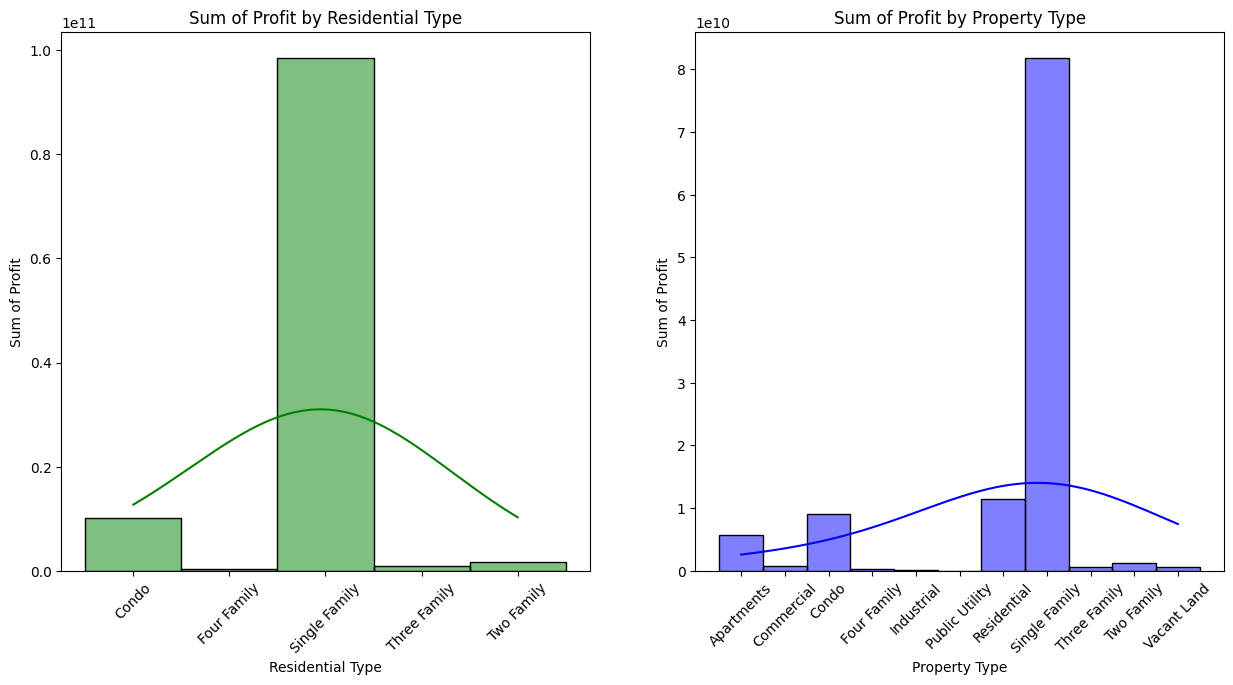

In [83]:
mean_profit = df.groupby('Residential Type')['Profit'].sum()
mean_profit = mean_profit.round(2)
mean_profit_df = mean_profit.reset_index()
mean_pro = df.groupby('Property Type')['Profit'].sum()
mean_pro= mean_pro.round(2)
mean_pro_df = mean_pro.reset_index()
# colors = sns.color_palette('husl', len(mean_profit_df))
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(mean_profit_df, x='Residential Type', weights='Profit',bins=30,kde=True,color='g', discrete=True,)
plt.xlabel('Residential Type')
plt.ylabel('Sum of Profit')
plt.title('Sum of Profit by Residential Type')
plt.xticks(rotation=45)

plt.subplot(122)
sns.histplot(mean_pro_df, x='Property Type', weights='Profit',bins=30,kde=True,color='b', discrete=True,)
plt.xlabel('Property Type')
plt.ylabel('Sum of Profit')
plt.title('Sum of Profit by Property Type')
plt.xticks(rotation=45)

plt.show()

##### Insight
- we made the highest profit from single family for both Residential and Property type
- from the Residential type condo made the second highest profit
- from Property type residential made the second highest profit

##### Checking The Year We Made The Highest profit

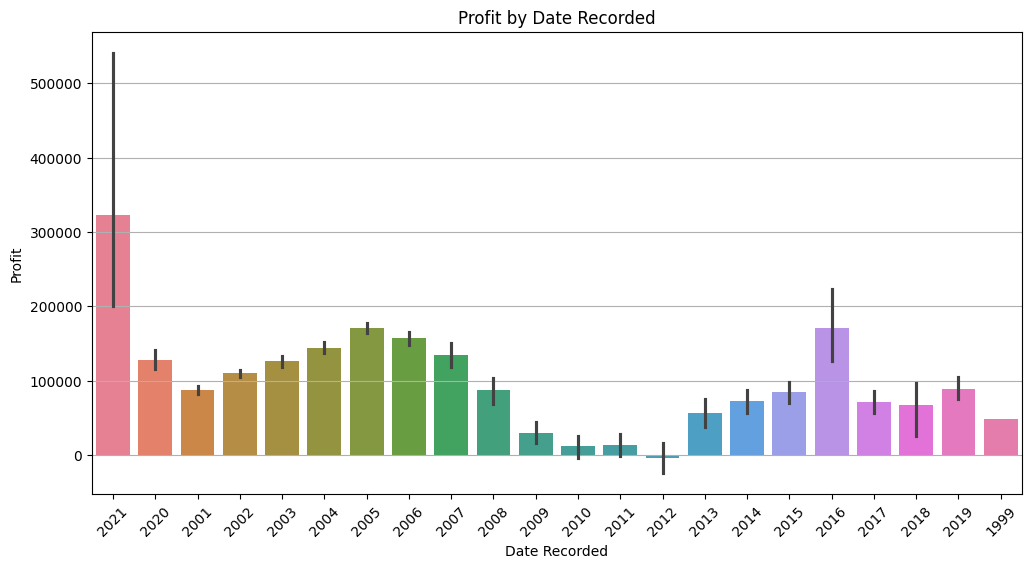

In [84]:
colors = sns.color_palette('husl', 22)
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='Date Recorded',y='Profit',palette=colors)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.title('Profit by Date Recorded')
plt.show()

##### Insight
- We made the highest profit in the year 2021, 2016 and 2005
- we made a great loss in the year 2012 
- we had a very small profit in the year 2009,2010 and 2011

In [85]:
df['Date Recorded'].value_counts()

Date Recorded
2005    79416
2004    73894
2020    62534
2002    60167
2006    57240
2003    56289
2019    52622
2015    48894
2017    48491
2021    48441
2016    47611
2018    47163
2007    46132
2014    41941
2010    39128
2013    37513
2009    36305
2008    34195
2012    32568
2011    32088
2001    14269
1999        1
Name: count, dtype: int64

##### Profit made by each residential type per year

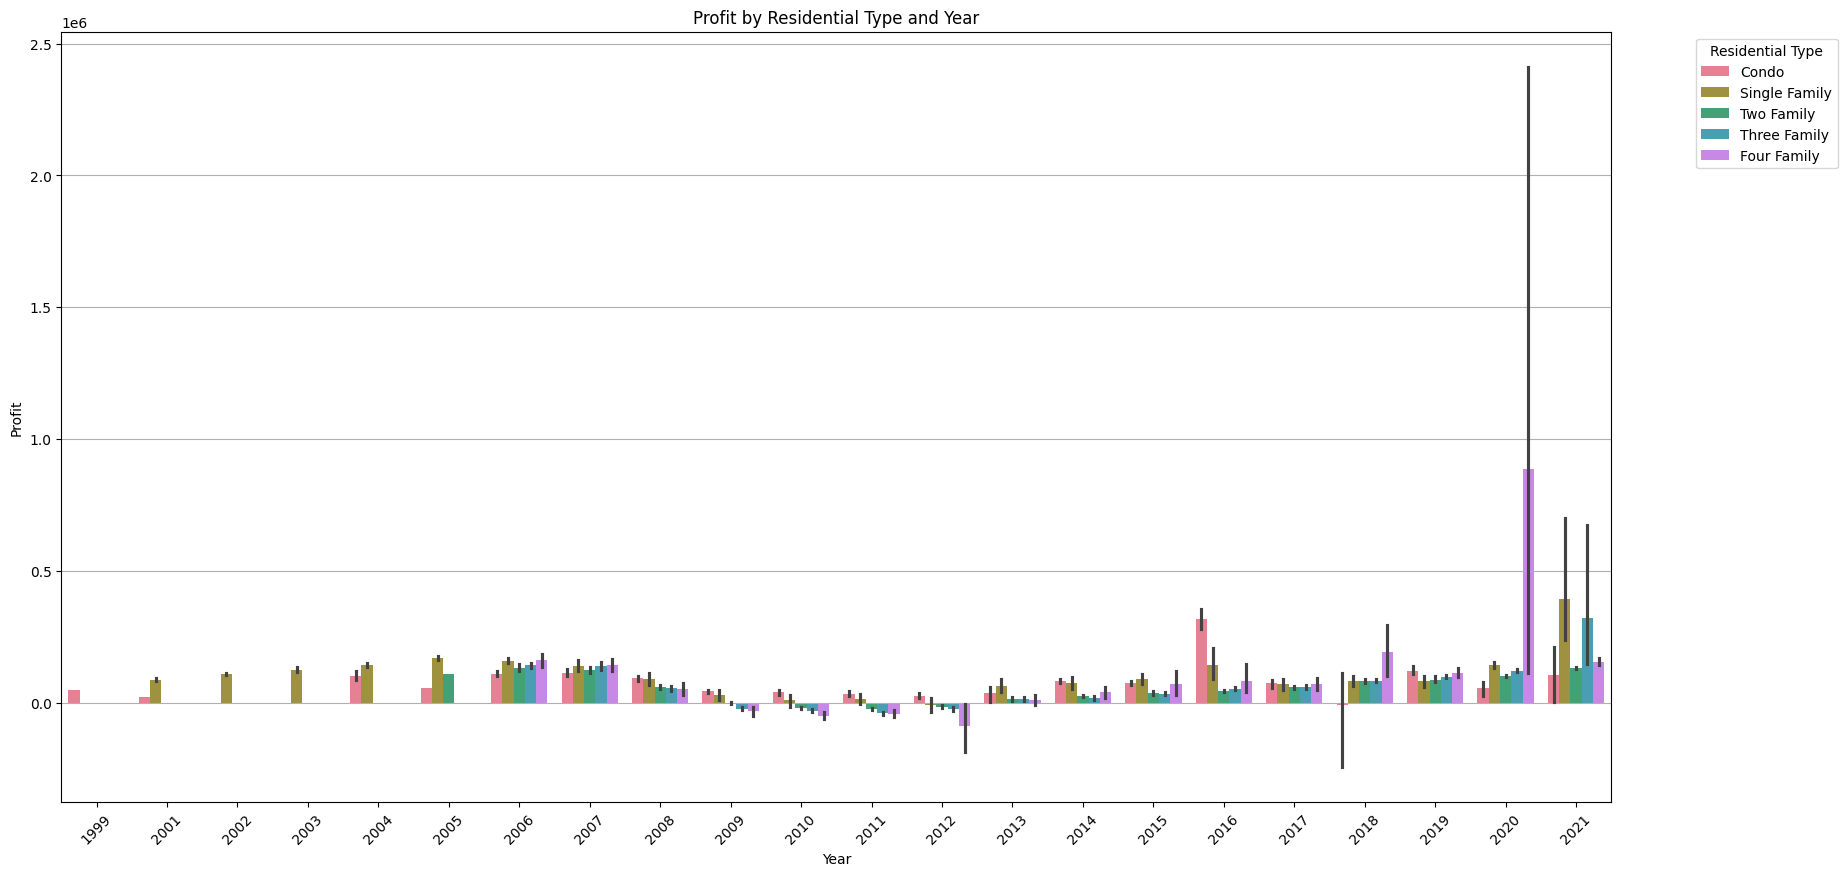

In [86]:
uf=df.sort_values(by='Date Recorded')
plt.figure(figsize=(20, 10))
sns.barplot(data=uf, x='Date Recorded', y='Profit', hue='Residential Type', palette='husl', dodge=True)
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit by Residential Type and Year')
plt.xticks(rotation=45)
plt.legend(title='Residential Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

##### Insight
- Four Family made the highest profit in year 2020
- from 2009 to 2014 our profit was significantly low
- We recorded a great loss on Four Family, Three Family and Two Family Residential Type in year 2009, 2010, 2011 and 2012 
- we made on Single Family Residential Type almost across all the years 

##### Ploting The Top 10 Towns with the highest profit and the Property Type that genarated the highest profit in each town

In [87]:
# top 10 towns with most profit
top_10_towns=df.groupby('Town')['Profit'].sum().nlargest(10).reset_index()
top_town_data=df[df['Town'].isin(top_10_towns['Town'])]
property_type_profit = top_town_data.groupby(['Town', 'Property Type'])['Profit'].sum().reset_index()
top_property_types = property_type_profit.loc[property_type_profit.groupby('Town')['Profit'].idxmax()]
final_result = pd.merge(top_10_towns, top_property_types, on='Town',suffixes=('_Town', '_Property_Type'))
final_result.columns = ['Town', 'Total Profit', 'Property Type', 'Property Type Profit']
final_result

,Town,Total Profit,Property Type,Property Type Profit
0,Stamford,1.258127e+10,Single Family,9.155453e+09
1,Willington,5.634477e+09,Apartments,4.997761e+09
2,Westport,4.911115e+09,Single Family,4.810163e+09
3,Darien,3.786207e+09,Single Family,3.236885e+09
4,Fairfield,3.765785e+09,Single Family,3.562344e+09
5,Danbury,3.259039e+09,Single Family,2.220885e+09
6,Norwalk,3.004869e+09,Single Family,1.606754e+09
7,West Hartford,2.904796e+09,Single Family,2.447685e+09
8,Rocky Hill,2.835058e+09,Condo,2.189780e+09
9,New Canaan,2.527751e+09,Single Family,2.368417e+09


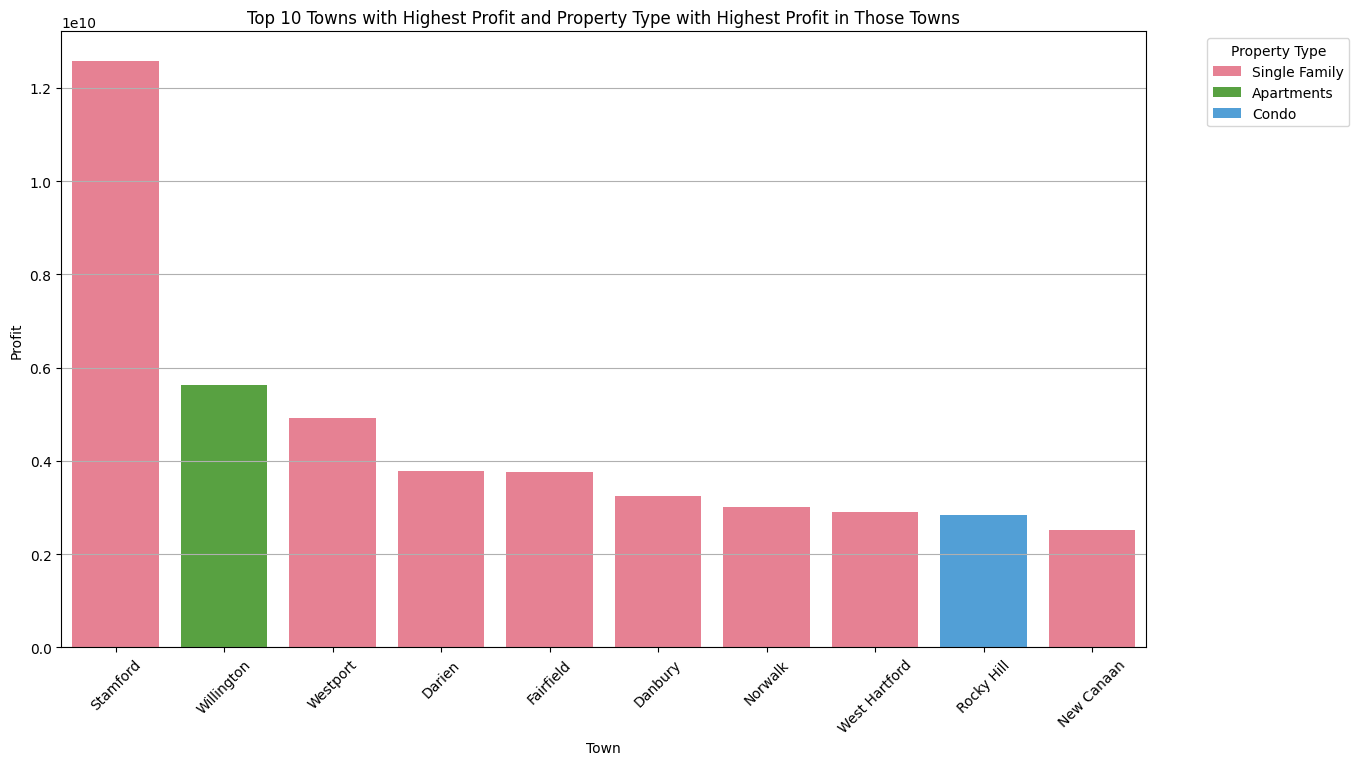

In [88]:
plt.figure(figsize=(14, 8))
sns.barplot(data=final_result, x='Town', y='Total Profit', hue='Property Type', dodge=False, palette='husl')
plt.xlabel('Town')
plt.ylabel('Profit')
plt.title('Top 10 Towns with Highest Profit and Property Type with Highest Profit in Those Towns')
plt.xticks(rotation=45)
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

##### Insight
- Single Family yields the most profit in majority of the Towns 
- In Willington, Apartment Property Type yields the most
- In Rocky Hill, Condo Property Type yields the most 

##### Multivariate Analysis using pie plot

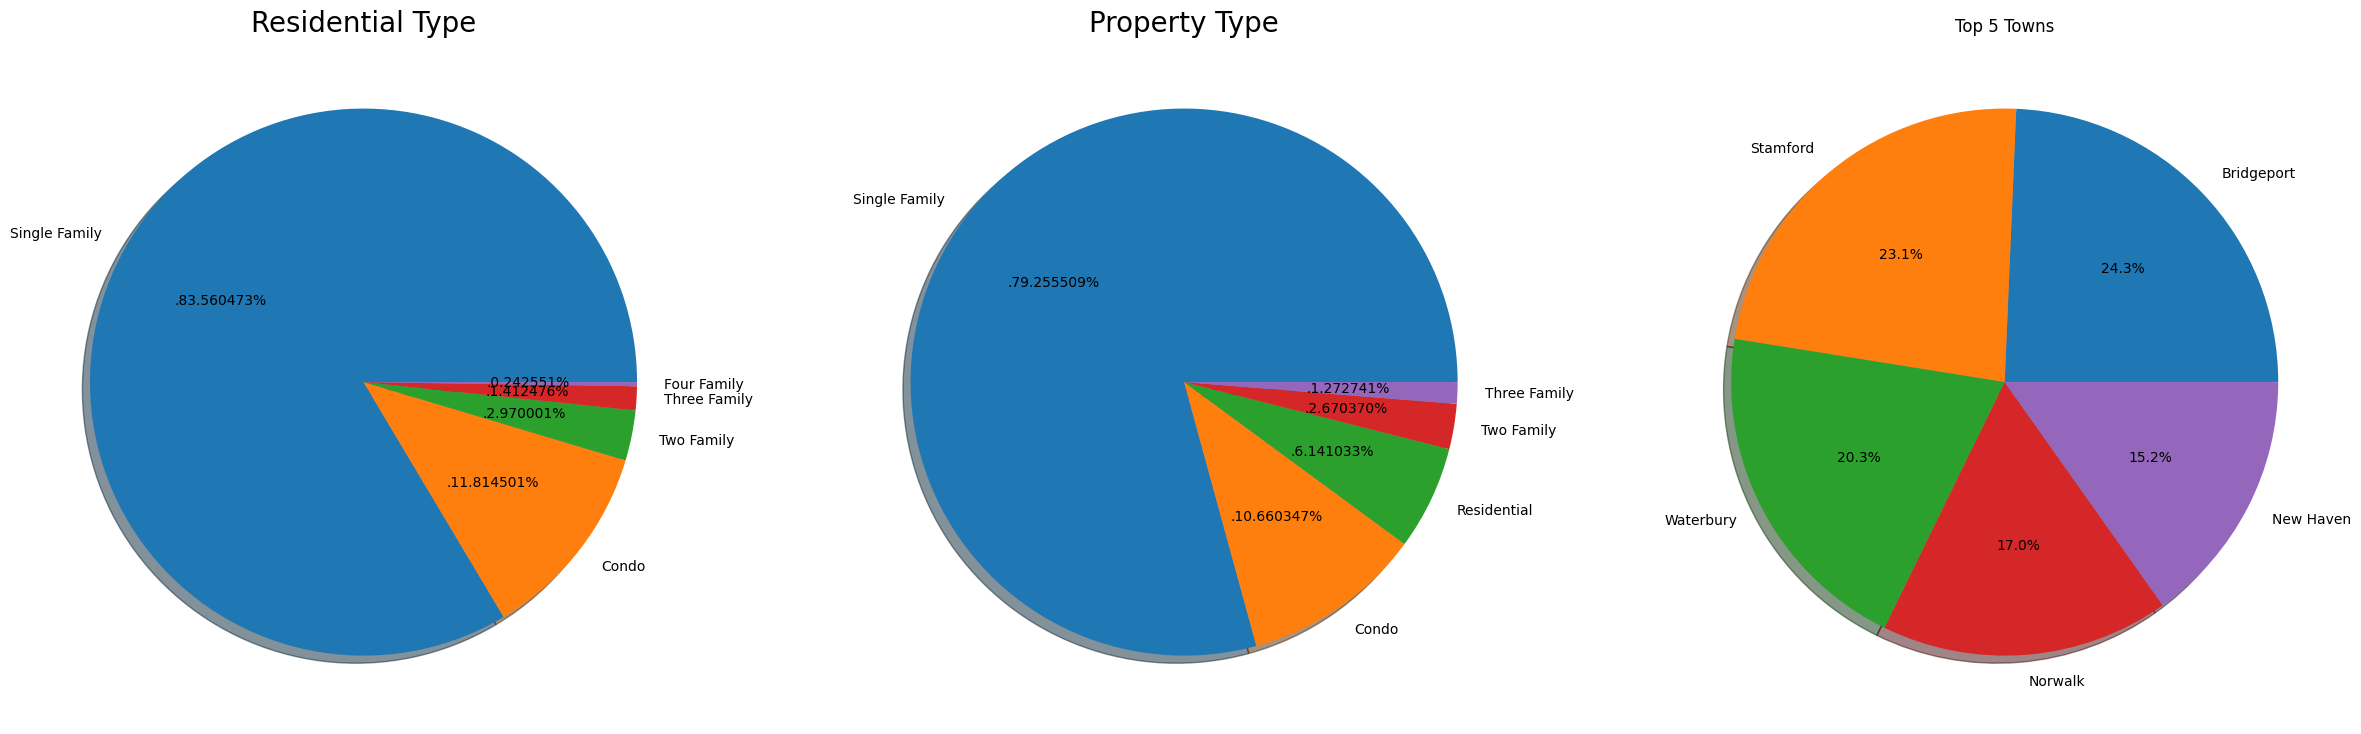

In [89]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 3, 1)
size = df['Residential Type'].value_counts()
labels = 'Single Family','Condo','Two Family','Three Family','Four Family'
color = ['red','green', 'cyan','blue','orange']


plt.pie(size, labels = labels,autopct = '.%2f%%', shadow=True)
plt.title('Residential Type', fontsize = 20)
plt.axis('off')



plt.subplot(1, 3, 2)
property_counts = df['Property Type'].value_counts().reset_index()
property_counts.columns = ['Property', 'Count']
top_5_property = property_counts.nlargest(5, 'Count')

plt.pie(top_5_property['Count'],labels =top_5_property['Property'],autopct = '.%2f%%', shadow=True)
plt.title('Property Type', fontsize = 20)
plt.axis('off')

plt.subplot(1, 3, 3)
town_counts = df['Town'].value_counts().reset_index()
town_counts.columns = ['Town', 'Count']
top_5_towns = town_counts.nlargest(5, 'Count')

plt.pie(top_5_towns['Count'], labels=top_5_towns['Town'],autopct='%1.1f%%',shadow=True,)
plt.title('Top 5 Towns')
plt.axis('off')
plt.show()

##### Insight
- single family takes over 2/3 of the residential and property type
- Bridgeport has the highest ratio of top 5 towns, followed by Stamford 
- The least Residential Type is Four Family

In [90]:
df['Residential Type'] = df['Residential Type'].astype('category')

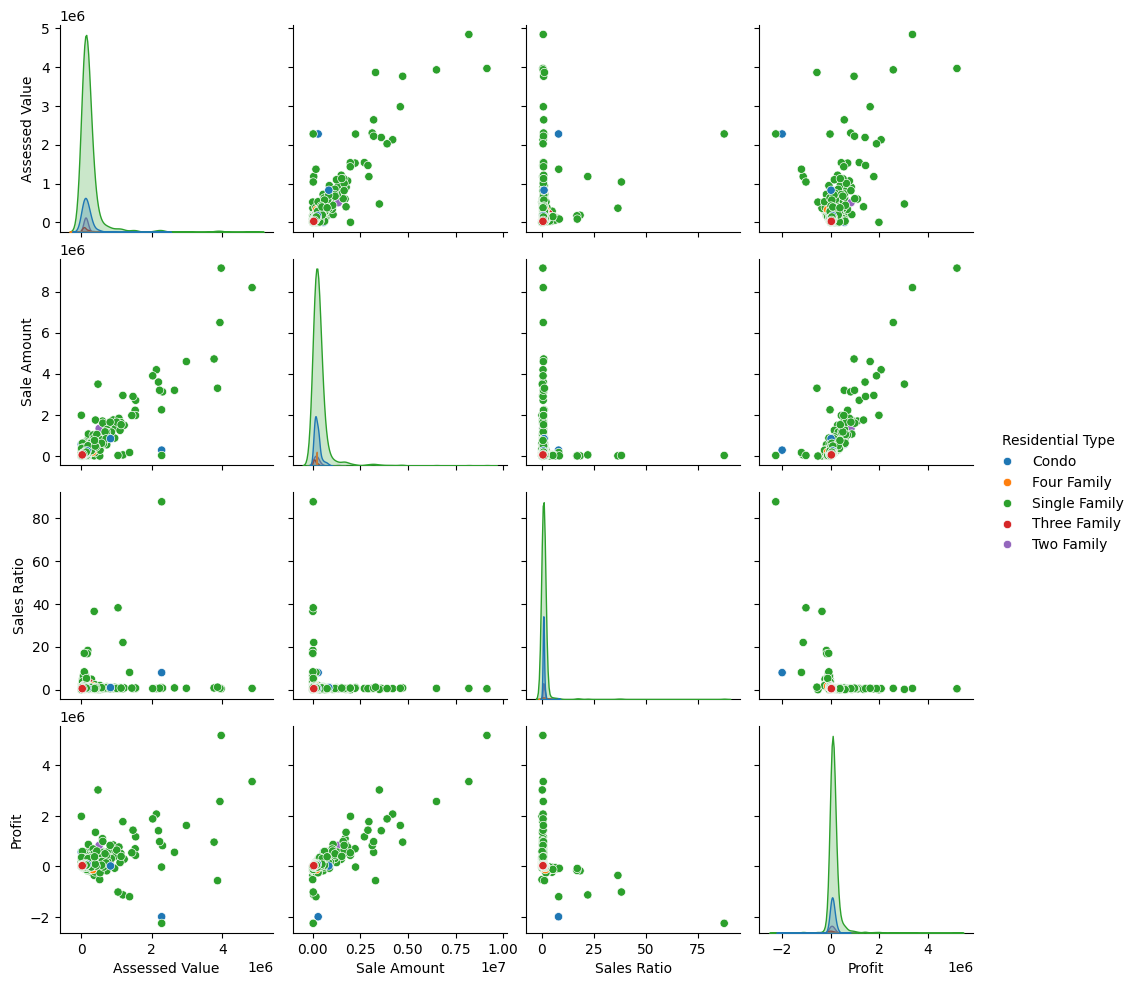

In [91]:
columns_of_interest = ['Assessed Value', 'Sale Amount', 'Sales Ratio', 'Profit', 'Residential Type']
df_sample = df[columns_of_interest].sample(n=1000, random_state=42)
sns.pairplot(df_sample, hue='Residential Type')
plt.show()

In [92]:
df.to_csv('Cleaned_Reals_Estate_Data.csv', index=False)

In [93]:
df.nunique()

List Year               20
Date Recorded           22
Town                   169
Address             714219
Assessed Value       91378
Sale Amount          57369
Sales Ratio         547036
Property Type           11
Residential Type         5
Profit              147515
dtype: int64

##### Conclution
- Real Estate Price is related to the Property Type,Residential Type, and Town
- The price is not much related to the Date Recorded
- Single Family leads in the percentage of profit generated 
- Investing more in Single Family Property is beneficial 